1. Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2. Read data and print first few lines

In [2]:
data = pd.read_csv("../Data/raw_analyst_ratings.csv")
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


3. Obtain basic statistics for textual lengths (headline length)

In [4]:
data['headline_length'] = data['headline'].apply(len)
mean_length = data['headline_length'].mean()
median_length = data['headline_length'].median()
min_length = data['headline_length'].min()
max_length = data['headline_length'].max()
std_dev_length = data['headline_length'].std()

print(f"Mean headline length: {mean_length}")
print(f"Median headline length: {median_length}")
print(f"Minimum headline length: {min_length}")
print(f"Maximum headline length: {max_length}")
print(f"Standard deviation of headline length: {std_dev_length}")

Mean headline length: 73.12051490484095
Median headline length: 64.0
Minimum headline length: 3
Maximum headline length: 512
Standard deviation of headline length: 40.73530993195065


4. Count the number of articles per publisher and view as dataframe

In [12]:
publisher_counts = data['publisher'].value_counts()
publisher_counts_df = publisher_counts.reset_index()
publisher_counts_df.columns = ['Publisher', 'Article Count']

max_publisher = publisher_counts.idxmax()
max_count = publisher_counts.max()

print(f"The publisher with the most articles is '{max_publisher}' with {max_count} articles.")

print("\n", publisher_counts_df)



The publisher with the most articles is 'Paul Quintaro' with 228373 articles.

               Publisher  Article Count
0         Paul Quintaro         228373
1            Lisa Levin         186979
2     Benzinga Newsdesk         150484
3         Charles Gross          96732
4         Monica Gerson          82380
...                 ...            ...
1029          MoneyGeek              1
1030             muathe              1
1031      Robert Morris              1
1032    LeftCoastHedgie              1
1033     Jeremie Capron              1

[1034 rows x 2 columns]


5. Publication date analysise to see trends over time

In [19]:
#convert date format to date time format and make not time for those with convertion problem
data['date'] = pd.to_datetime(data['date'], errors='coerce')
# print(data[data['date'].isna()])
# print("Rows with parsing issues:")
# print(data[data['date'].isna()])

print("\nFirst few rows of 'date':")
print(data['date'].head())


First few rows of 'date':
0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]


In [20]:
# Extract year, month, day, and day of the week
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.day_name()

In [21]:
# Count the number of publications per month
monthly_counts = data.groupby(['year', 'month']).size().reset_index(name='count')

# Print the result
print("Monthly Trends:")
print(monthly_counts)


Monthly Trends:
       year  month  count
0    2011.0    4.0      6
1    2011.0    5.0     78
2    2011.0    6.0     96
3    2011.0    7.0    137
4    2011.0    8.0    149
..      ...    ...    ...
106  2020.0    2.0   2356
107  2020.0    3.0   4680
108  2020.0    4.0   4616
109  2020.0    5.0   9333
110  2020.0    6.0   5990

[111 rows x 3 columns]


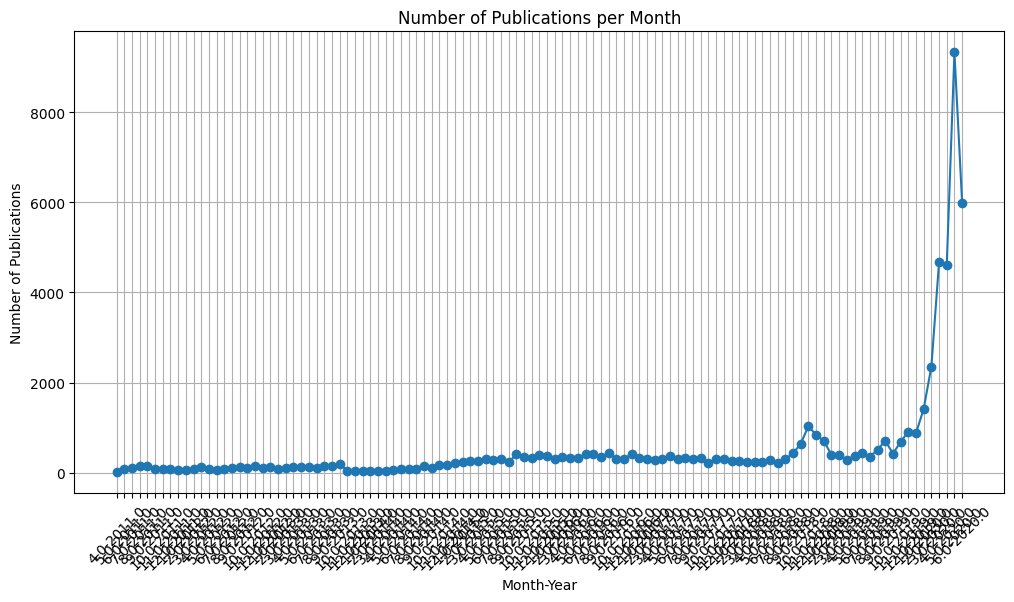

In [22]:
# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['month'].astype(str) + '-' + monthly_counts['year'].astype(str), monthly_counts['count'], marker='o')
plt.title('Number of Publications per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [23]:
# Count the number of publications per year
annual_counts = data.groupby('year').size().reset_index(name='count')

# Print the result
print("Annual Trends:")
print(annual_counts)

Annual Trends:
     year  count
0  2011.0    760
1  2012.0   1187
2  2013.0   1240
3  2014.0   1189
4  2015.0   3695
5  2016.0   4223
6  2017.0   3581
7  2018.0   5395
8  2019.0   6325
9  2020.0  28392


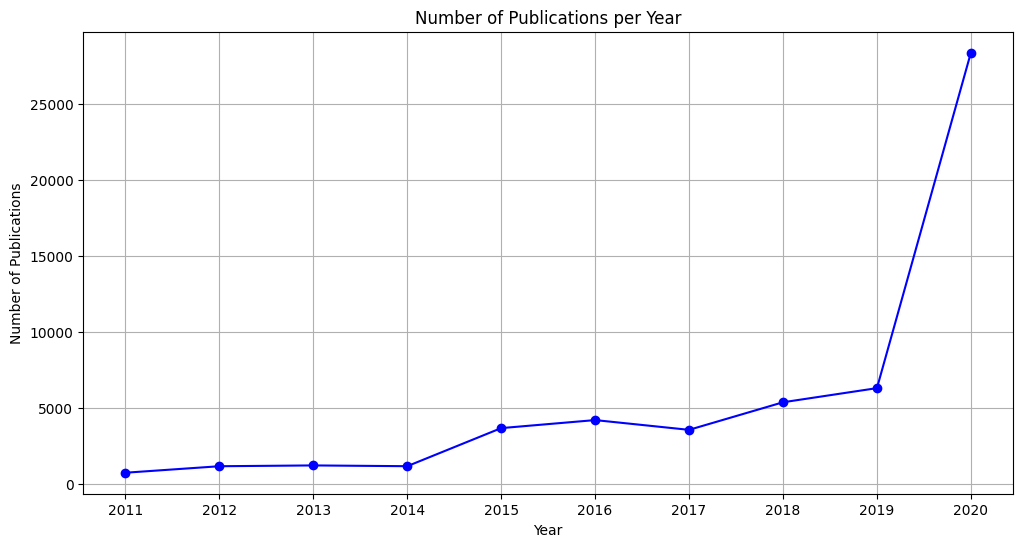

In [24]:
import matplotlib.pyplot as plt

# Plot annual trends
plt.figure(figsize=(12, 6))
plt.plot(annual_counts['year'], annual_counts['count'], marker='o', linestyle='-', color='b')
plt.title('Number of Publications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.xticks(annual_counts['year'])  # Show all years on the x-axis
plt.show()
